In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import zscore

# Análise Exploratória 

In [2]:
dados = pd.read_csv("C:/Projetos Pessoais/DataScience/analise_Previsao_Churn_teleComunicacoes/dados/dataSet_TeleComunicacoes_brutos.csv")

In [3]:
dados.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5311,8053-WWDRO,Female,0,Yes,No,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.50,146.3,Yes
4723,4274-OWWYO,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,74.35,Yes
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
3338,1513-XNPPH,Female,0,No,No,12,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,89.40,1095.65,Yes
1821,3536-IQCTX,Male,1,Yes,No,32,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,85.30,2661.1,Yes
5225,5376-PCKNB,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.45,7459,No
2160,7101-HRBLJ,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),83.70,6096.9,No
374,6862-CQUMB,Male,0,No,No,37,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),96.10,3646.8,No
2281,9578-VRMNM,Female,0,No,No,16,Yes,Yes,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),65.20,1043.35,Yes
3514,6993-YCOBK,Male,0,Yes,Yes,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,110.60,6586.85,No


In [4]:
dados.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
dados.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Convertendo 'TotalCharges' para float
dados['TotalCharges'] = dados['TotalCharges'].replace('', pd.NA)
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')

In [8]:
dados.TotalCharges.dtype

dtype('float64')

In [9]:
# Mudando type de 'SeniorCitizen' para tipo object pois é categórica
dados['SeniorCitizen'] = dados['SeniorCitizen'].astype(str)
dados.SeniorCitizen.dtype

dtype('O')

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
dados.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
# Renomear as colunas 
mapeamento_dados = {
    'gender': 'sexo',
    'SeniorCitizen': 'idoso', 
    'Partner': 'casado(a)', 
    'Dependents': 'possuiDependente',
    'tenure': 'fidelidade',
    'PhoneService': 'servico_telefonico', 
    'MultipleLines': 'multiplas_linhas', 
    'InternetService': 'servico_internet', 
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online', 
    'DeviceProtection': 'protecao_dispositivo', 
    'TechSupport': 'suporte_tecnico', 
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_filmes', 
    'Contract': 'contrato', 
    'PaperlessBilling': 'fatura_sem_papel', 
    'PaymentMethod': 'forma_pagamento',
    'MonthlyCharges': 'valor_mensal',
    'TotalCharges': 'valor_total_pago'
}

dados = dados.rename(columns=mapeamento_dados)


In [13]:
dados.columns

Index(['customerID', 'sexo', 'idoso', 'casado(a)', 'possuiDependente',
       'fidelidade', 'servico_telefonico', 'multiplas_linhas',
       'servico_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'Streaming_TV',
       'Streaming_filmes', 'contrato', 'fatura_sem_papel', 'forma_pagamento',
       'valor_mensal', 'valor_total_pago', 'Churn'],
      dtype='object')

In [14]:
# Separação de colunas numéricas e categóricas e variável target

cats = ['sexo', 'idoso', 'casado(a)', 'possuiDependente',
       'servico_telefonico', 'multiplas_linhas',
       'servico_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'Streaming_TV',
       'Streaming_filmes', 'contrato', 'fatura_sem_papel', 'forma_pagamento']

nums = ['fidelidade','valor_mensal','valor_total_pago']

target = ['Churn']

## Explorando Variáveis numéricas

In [15]:
dados[nums].describe()

,fidelidade,valor_mensal,valor_total_pago
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [16]:
dados[nums].corr()

,fidelidade,valor_mensal,valor_total_pago
fidelidade,1.00000,0.247900,0.825880
valor_mensal,0.24790,1.000000,0.651065
valor_total_pago,0.82588,0.651065,1.000000


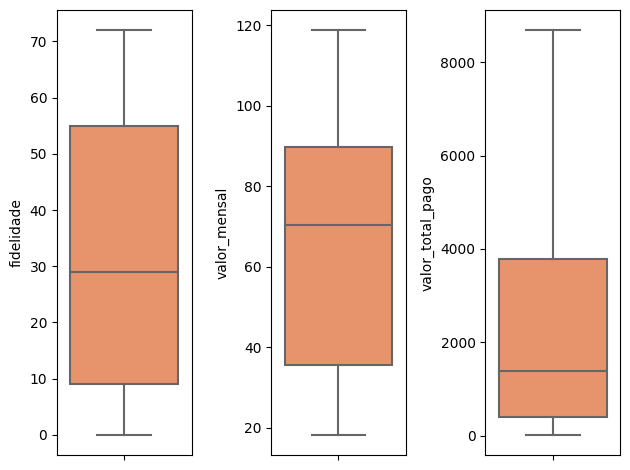

In [17]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = dados[features[i]], palette = 'OrRd', orient = 'v')
    plt.tight_layout()

In [18]:
# Verificando outliers 

In [19]:
registros = np.array(dados['valor_total_pago']) 
type(registros)

numpy.ndarray

In [20]:
z_scores = zscore(registros)

In [21]:
print("Qtd de Z-scores:", np.count_nonzero(~np.isnan(z_scores)))
print("Não existem valores outliers nas variáveis numéricas")

Qtd de Z-scores: 0
Não existem valores outliers nas variáveis numéricas


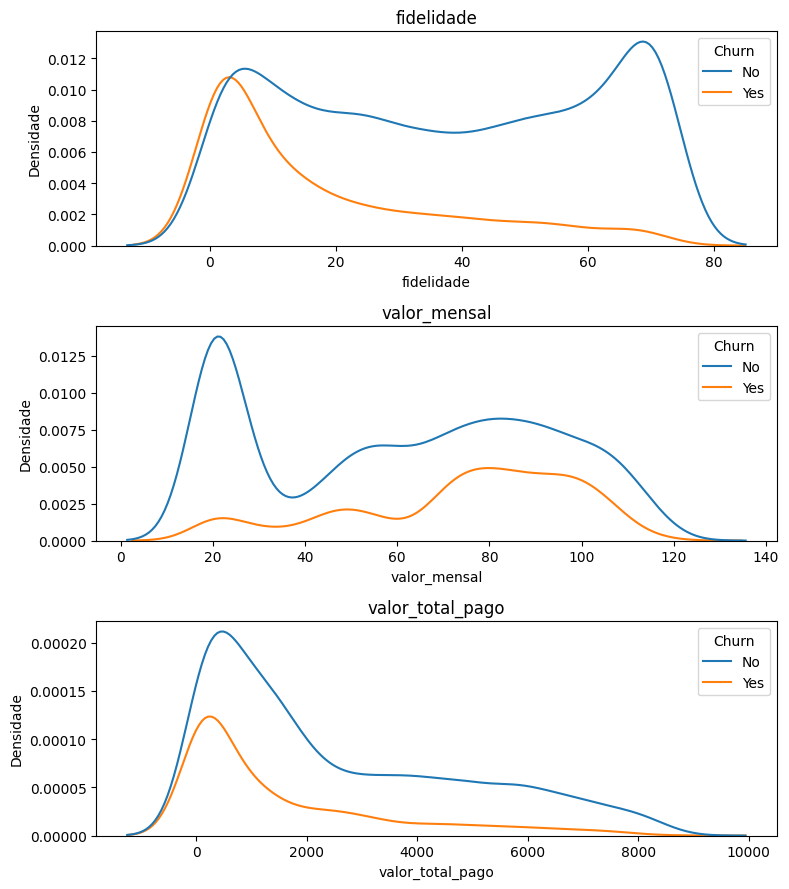

In [22]:
# Associando as varáveis numéricas com a variável target
num_variaveis = len(nums)
num_linhas = num_variaveis

plt.figure(figsize=(8, 3 * num_linhas))  # Define o tamanho da figura

for i, variavel in enumerate(nums, start=1):
    plt.subplot(num_linhas, 1, i)
    sns.kdeplot(data=dados, x=variavel, hue='Churn')
    plt.title(variavel)
    plt.xlabel(variavel)
    plt.ylabel('Densidade')

plt.tight_layout()  # Organiza os subplots para melhor ajuste
plt.show()

- Conclusões das variáveis numéricas
 - Sem valores outliers
 - A variável fidelidade possui grande impacto no Churn, quanto maior a fidelidade, menor a chance de cancelamentos
 - A taxa de cancelamentos para mensalidades menores é extremamente pequena
 - Valor total pago segue uma proporcionalidade normal para cancelamentos, vou excluir

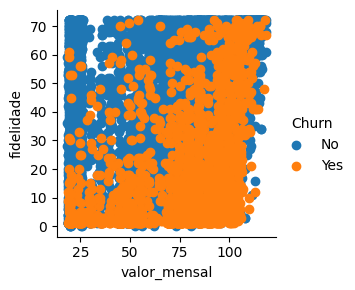

In [23]:
sns.FacetGrid(dados, hue = 'Churn').map(plt.scatter, 'valor_mensal', 'fidelidade').add_legend()

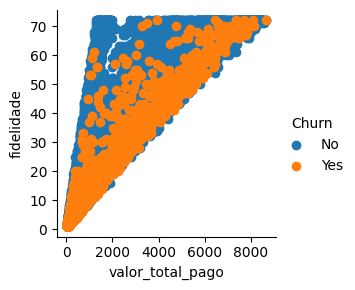

In [24]:
sns.FacetGrid(dados, hue = 'Churn').map(plt.scatter, 'valor_total_pago', 'fidelidade').add_legend()

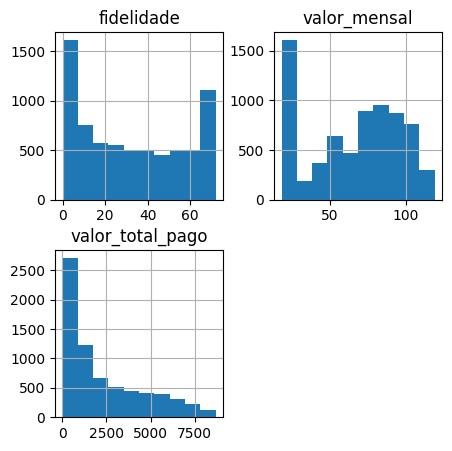

In [25]:
dados.hist(figsize = (5,5), bins = 10) 
plt.show()

## Explorando Variáveis Categóricas

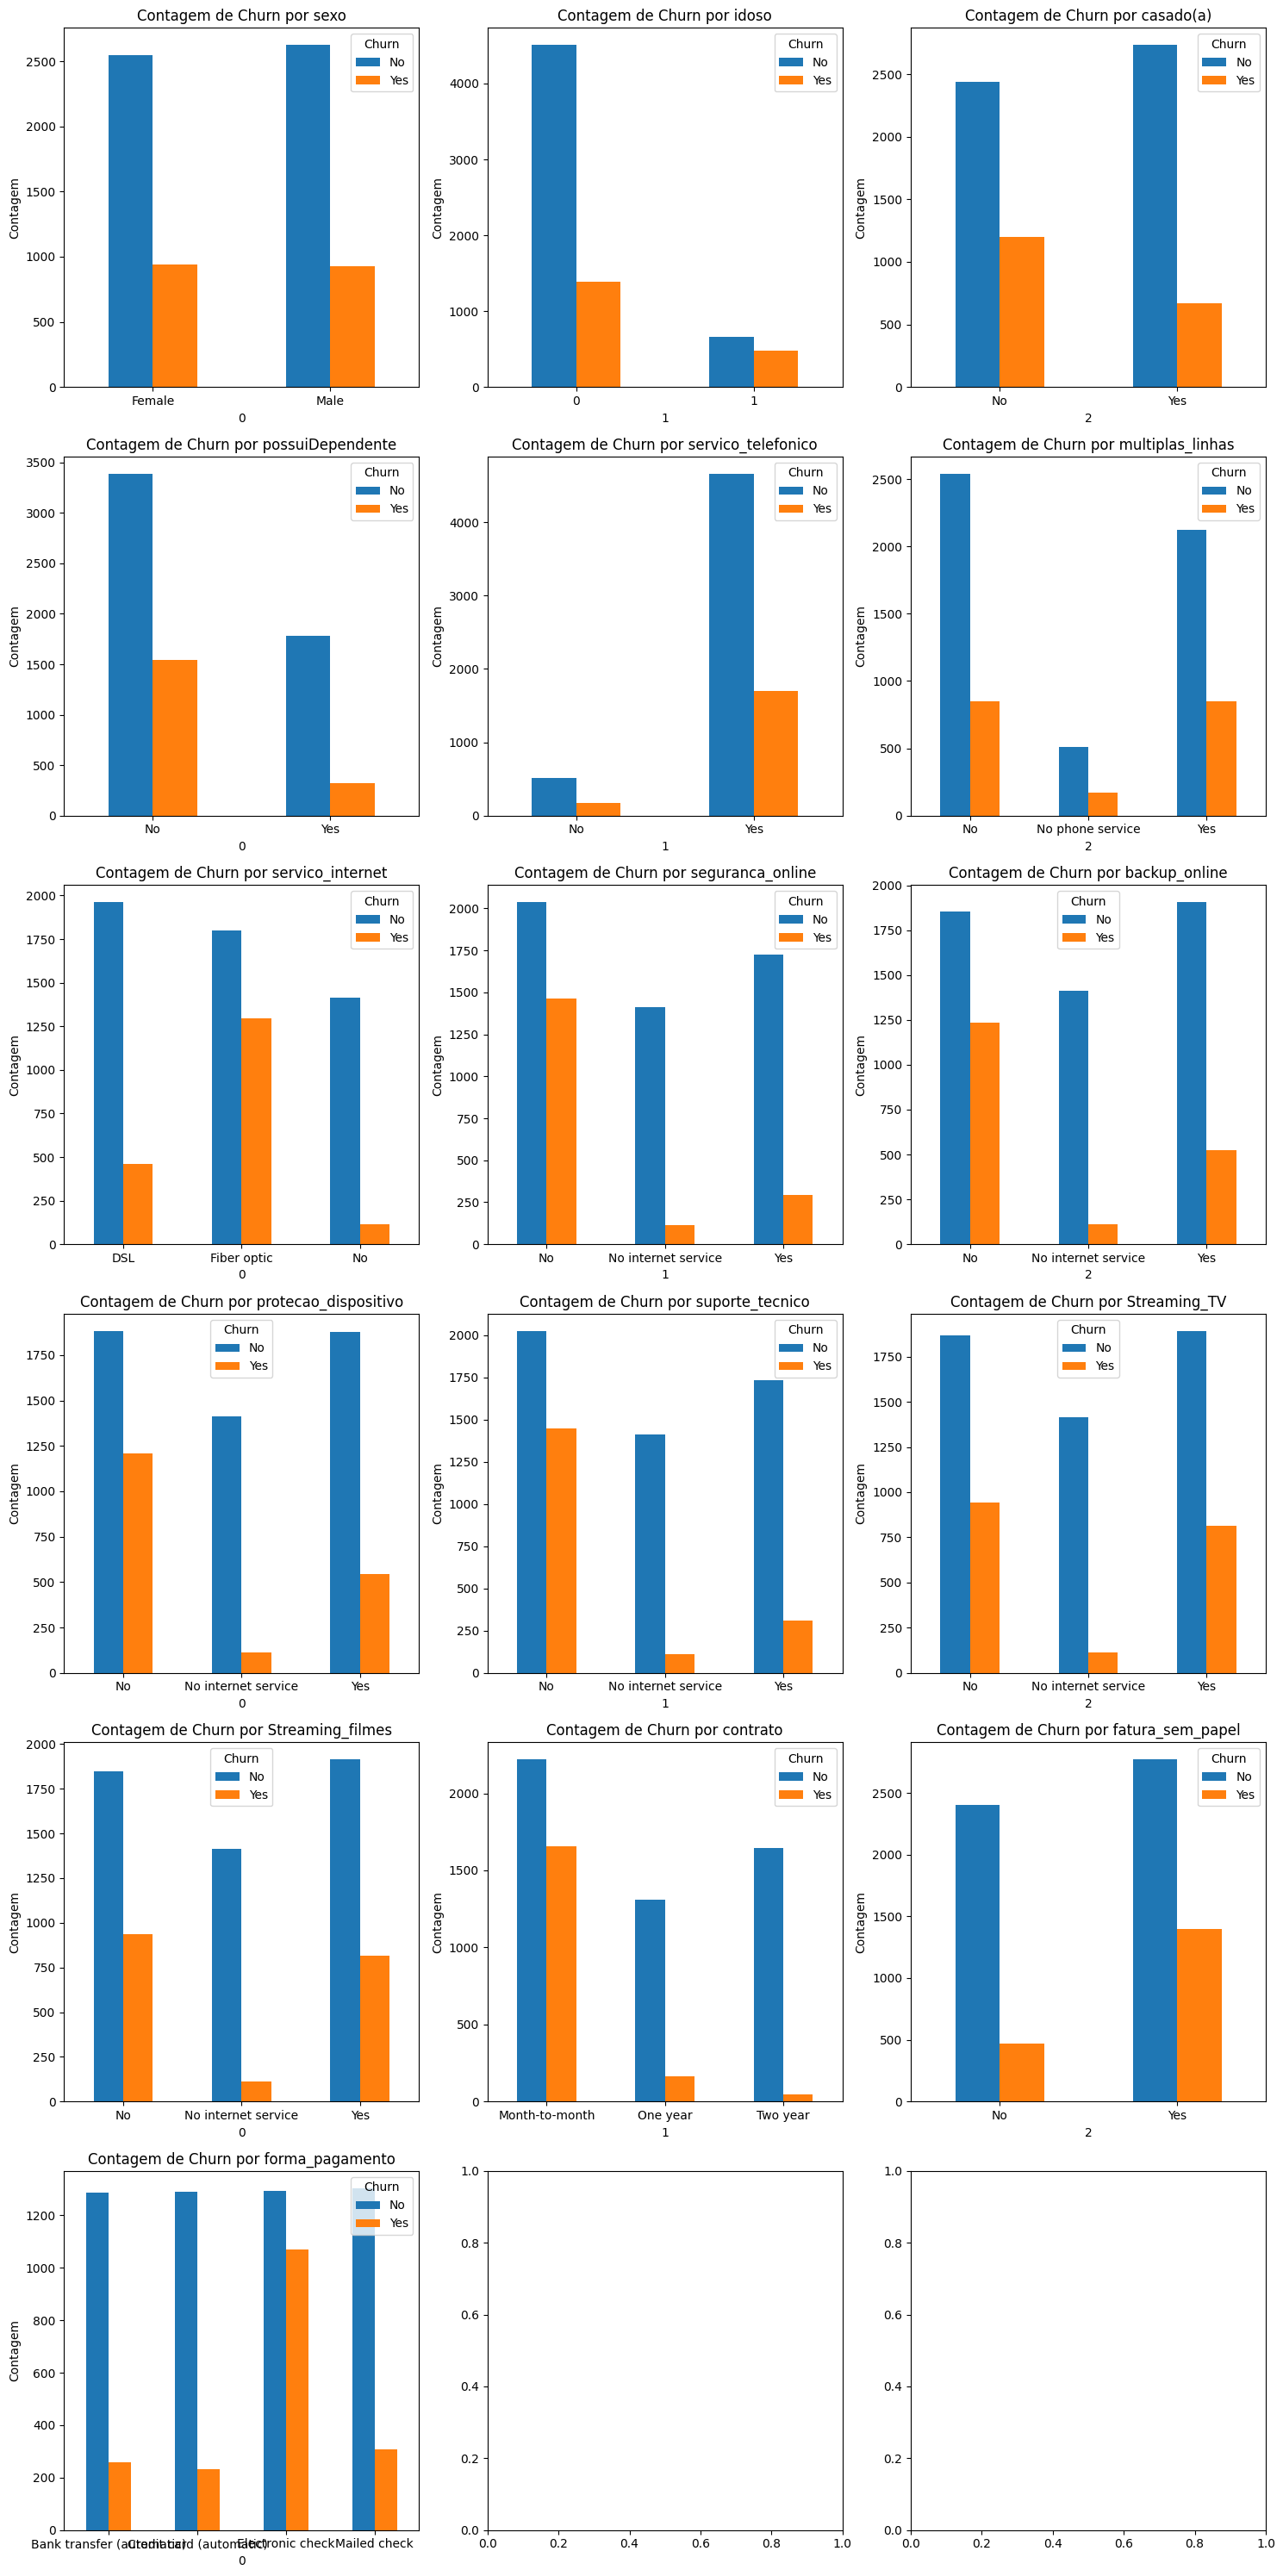

In [26]:
# Relação das variáveis categóricas com a variável target

num_colunas_por_linha = 3
num_linhas = (len(cats) + num_colunas_por_linha - 1) // num_colunas_por_linha
# Criar subplots
fig, axes = plt.subplots(num_linhas, num_colunas_por_linha, figsize=(15, 5 * num_linhas))
fig.subplots_adjust(hspace=0.5)
# Define a paleta do Seaborn
# Iterar pelas colunas categóricas e criar os gráficos
for i, col in enumerate(cats):
    row = i // num_colunas_por_linha
    col = i % num_colunas_por_linha
    contingency_table = pd.crosstab(dados[cats[i]], dados['Churn'])
    ax = contingency_table.plot(kind='bar', ax=axes[row, col])
    ax.set_title(f'Contagem de Churn por {cats[i]}')
    ax.set_xlabel(col)
    ax.set_ylabel('Contagem')
    ax.legend(title='Churn')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# Ajustar layout
plt.tight_layout()
# Exibir os gráficos
plt.show()

#### Verificando as proporcionalidades de cada variável

Loop em cada variável com intuito de verificar variáveis com maiores impactos e forte relação com 'Churn'

In [27]:
# For para imprimir todos os DF com o campo (%)
for i in cats:
    group1 = dados.groupby(i)['Churn'].value_counts().reset_index()
    group2 = dados.groupby(['Churn'])['Churn'].value_counts().reset_index()
    group3 = group1.merge(group2, on = 'Churn')
    group4 = dados.groupby(i)[i].value_counts().reset_index()
    group5 = group1.merge(group4, on = i)
    group5['Porcentagem (%)'] = round(group5['count_x'] / group5['count_y'] * 100, 2)
    group5.rename(columns = {'count_x': 'Total/Categoria', 'count_y':'Total Geral'}, inplace = True)

    print(f"\n\t\tPanorama variável {i}")
    print(group5)


		Panorama variável sexo
     sexo Churn  Total/Categoria  Total Geral  Porcentagem (%)
0  Female    No             2549         3488            73.08
1  Female   Yes              939         3488            26.92
2    Male    No             2625         3555            73.84
3    Male   Yes              930         3555            26.16

		Panorama variável idoso
  idoso Churn  Total/Categoria  Total Geral  Porcentagem (%)
0     0    No             4508         5901            76.39
1     0   Yes             1393         5901            23.61
2     1    No              666         1142            58.32
3     1   Yes              476         1142            41.68

		Panorama variável casado(a)
  casado(a) Churn  Total/Categoria  Total Geral  Porcentagem (%)
0        No    No             2441         3641            67.04
1        No   Yes             1200         3641            32.96
2       Yes    No             2733         3402            80.34
3       Yes   Yes              669  

- Conclusões das variáveis categóricas:
 - Variável costumerID será excluída, pois representa apenas o código do cliente;
 - As variáveis  'sexo', 'servico_telefonico', 'multiplas_linhas' não possuem impacto significativo nos cancelamentos, pois o 'churn' é proporcional para os grupos
 - Pessoas idosas tendem a cancelar com mais frequencia (taxa de 41%)
 - Taxa de cancelamento para pessoas que utilizam fibra ótica é grande (41%)
 - As variaves 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'Streaming_TV' e 'Streaming_filmes' possuem saídas e proporcionalidades parecidas, provavelmente a pessoa que possui um serviço também possui os outros, por isso tomarei algumas decisões, visando a crianção do modelo de ML:
     - Excluirei a variávei 'Streaming_filmes', por representar a mesma info de 'Streaming_TV'
     - O mesmo ocorre para 'suporte_tecnico' e 'seguranca_online', excluirei o segundo
     - Idem para 'backup_online' e 'protecao_dispositivo', excluirei o backup online - Tirei protecao tb
  - Os contratos com vencimentos mensais possuem uma elevada taxa de cancelamentos (42.71%), já as taxas de Churn para contratos com vencimento anual e bi-anual caem consideravelmente (11% e 2% respectivamente)
  - 1/3 das pessoas que recebem a fatura por papel, cancelam o serviço, já para pessoas que recebem por outras vias, essa proporção cai para 1/6 aproximadamente
  - Na variável 'forma_pagamento', podemos ver que a taxa de cancelamento de todas as formas é de aproximadamente 17%, exceto quando se trata de 'Electronic check', nesse caso a taxa de Churn eleva para 45.29%

In [28]:
# Quantia em dinheiro perdida por Churn de clientes
valor_total_churn = dados[dados['Churn'] == 'Yes'].groupby('Churn')['valor_mensal'].sum().reset_index()
print(f"Todos os cancelamentos vão impactar o caixa da empresa em ${valor_total_churn['valor_mensal']} por mês")
# valor_total_churn

Todos os cancelamentos vão impactar o caixa da empresa em $0    139130.85
Name: valor_mensal, dtype: float64 por mês


# Engenharia de Atributos

In [29]:
dados.sample(5)

,customerID,sexo,idoso,casado(a),possuiDependente,fidelidade,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,Streaming_TV,Streaming_filmes,contrato,fatura_sem_papel,forma_pagamento,valor_mensal,valor_total_pago,Churn
4717,9356-AXGMP,Male,0,Yes,No,38,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,110.70,4428.60,No
806,7382-DFJTU,Male,0,No,No,18,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,1058.10,No
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50,No
3409,4806-DXQCE,Female,1,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.65,7714.65,No
5333,3143-JQEGI,Female,0,Yes,Yes,13,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,88.35,1222.80,Yes


#### Verifica valores nulos

In [30]:
dados.isna().sum()

customerID               0
sexo                     0
idoso                    0
casado(a)                0
possuiDependente         0
fidelidade               0
servico_telefonico       0
multiplas_linhas         0
servico_internet         0
seguranca_online         0
backup_online            0
protecao_dispositivo     0
suporte_tecnico          0
Streaming_TV             0
Streaming_filmes         0
contrato                 0
fatura_sem_papel         0
forma_pagamento          0
valor_mensal             0
valor_total_pago        11
Churn                    0
dtype: int64

In [31]:
dados.groupby('fidelidade')['fidelidade'].value_counts()

fidelidade
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: count, Length: 73, dtype: int64

In [32]:
dados[dados['valor_total_pago'].isna()]

,customerID,sexo,idoso,casado(a),possuiDependente,fidelidade,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,Streaming_TV,Streaming_filmes,contrato,fatura_sem_papel,forma_pagamento,valor_mensal,valor_total_pago,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [33]:
# Preenchendo NaN com valores de valor mensal
dados['valor_total_pago'] = np.where(dados['valor_total_pago'].isna(), dados['valor_mensal'], dados['valor_total_pago'])

In [34]:
dados.isna().sum()

customerID              0
sexo                    0
idoso                   0
casado(a)               0
possuiDependente        0
fidelidade              0
servico_telefonico      0
multiplas_linhas        0
servico_internet        0
seguranca_online        0
backup_online           0
protecao_dispositivo    0
suporte_tecnico         0
Streaming_TV            0
Streaming_filmes        0
contrato                0
fatura_sem_papel        0
forma_pagamento         0
valor_mensal            0
valor_total_pago        0
Churn                   0
dtype: int64

#### Valores duplicados

In [35]:
dados.duplicated().sum()

0

#### Exclusão de colunas

In [36]:
# Cópia do data frame 
dados_eng =  dados.copy()

In [37]:
dados_eng.shape

(7043, 21)

In [38]:
dados.drop(['customerID', 'multiplas_linhas', 'protecao_dispositivo', 'servico_telefonico', 'sexo', 'Streaming_filmes',
            'seguranca_online', 'backup_online'], axis=1, inplace=True)

In [39]:
dados.sample(10)

,idoso,casado(a),possuiDependente,fidelidade,servico_internet,suporte_tecnico,Streaming_TV,contrato,fatura_sem_papel,forma_pagamento,valor_mensal,valor_total_pago,Churn
2237,0,Yes,Yes,27,DSL,No,No,One year,Yes,Credit card (automatic),45.85,1246.40,No
5406,0,Yes,Yes,71,Fiber optic,No,Yes,Two year,Yes,Electronic check,97.20,6910.30,No
3724,0,Yes,Yes,62,No,No internet service,No internet service,One year,No,Bank transfer (automatic),24.80,1476.25,No
492,0,Yes,No,2,Fiber optic,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
1069,1,No,No,20,DSL,Yes,No,One year,No,Mailed check,54.00,1055.90,No
5390,1,No,No,12,Fiber optic,No,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
231,0,No,No,50,Fiber optic,Yes,No,Month-to-month,Yes,Credit card (automatic),93.50,4747.50,No
413,0,No,No,51,Fiber optic,Yes,No,Month-to-month,Yes,Electronic check,87.35,4473.00,No
1981,0,Yes,No,58,Fiber optic,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.10,5885.40,Yes
3957,0,Yes,No,63,Fiber optic,No,Yes,Two year,No,Electronic check,102.60,6296.75,No


In [40]:
# Salvando DF 
dados.to_csv('../dados/dados_eng', sep =',', index = False, encoding = 'utf-8')